# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [23]:
# Your code here.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x_values = [1,2,3,4,5,6,7,8,9,10]
y_values = [17,51,27,21,36,48,19,26,54,30]
z_values = [10,1,5,9,4,2,9,6,0,3]

student_data = pd.DataFrame(x_values)
student_data["y_values"]= y_values
student_data["z_values"]= z_values
student_data.columns= ["StudentID",'Age', 'Tardies']
student_data

,StudentID,Age,Tardies
0,1,17,10
1,2,51,1
2,3,27,5
3,4,21,9
4,5,36,4
5,6,48,2
6,7,19,9
7,8,26,6
8,9,54,0
9,10,30,3


Draw a dispersion diagram (scatter plot) for the data.

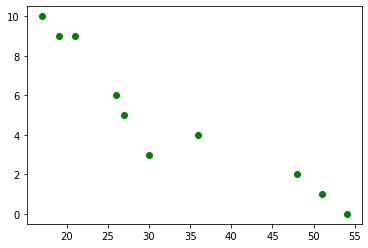

In [24]:
# Your code here.

plt.scatter(student_data["Age"], student_data["Tardies"], c= "green")
plt.show()


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
# Your response here. 

#Yes, there is a dawnard trend , where the higher is the age, the lower is the tardies. So it makes sense the hypothesis, where the younger the person is, the number of tardies increases.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [27]:
# Your response here.
#correlation:

print(student_data.corr())

#covariance:

print(student_data.cov())

           StudentID       Age   Tardies
StudentID   1.000000  0.186190 -0.347113
Age         0.186190  1.000000 -0.939163
Tardies    -0.347113 -0.939163  1.000000
           StudentID         Age    Tardies
StudentID   9.166667    7.722222  -3.722222
Age         7.722222  187.655556 -45.566667
Tardies    -3.722222  -45.566667  12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [36]:
# Your response here.

from sklearn import linear_model

model = linear_model.LinearRegression()
x = student_data[["Age"]]
y = student_data["Tardies"]

result = model.fit(x,y)

display(result.intercept_)
display(result.coef_)

12.888803363135768

array([-0.24282077])

Plot your regression model on your scatter plot.

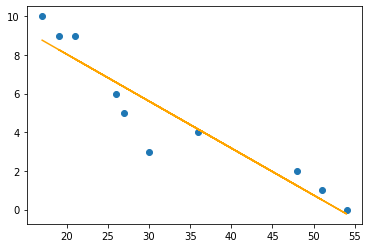

In [37]:
# Your code here.

regression_line = result.intercept_ + result.coef_*x

plt.scatter(x,y)
plt.plot(x , regression_line, c = "orange")
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [ ]:
# Your response here. 
#We can predict that age is a good predictor of tardiness, where the older you are, the fewer the chances of getting late. Theres a down trend in the line, it has a negative slope and intersects the y axis around the value 9.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [40]:
# Import any libraries you may need & the data

vehicles_df = pd.read_csv(r"C:\Users\crocs\OneDrive - Universidade de Lisboa\Ambiente de Trabalho\Gonçalo\College&Courses\Data Analytics- IronHack\Course Data Analytics\Labs\Week4\lab-regression-analysis\your-code\vehicles.csv")
vehicles_df.head(5)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [41]:
# Your response here. 

vehicles_df.corr()

#After checking the correlation matrix, the column that has the highest correlation with CO2 Emission Grams/mile is Fuel Barrels/Year with a correlation of 0.986189. 
#On the opposite side, the column that has the lowest correlation is the Year column

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,0.037876,0.082469,-0.221084,0.161818,0.267259,0.204751,-0.222300,-0.091913
Engine Displacement,0.037876,1.000000,0.901858,0.789752,-0.740317,-0.715039,-0.746782,0.803520,0.769678
Cylinders,0.082469,0.901858,1.000000,0.739517,-0.703866,-0.650287,-0.698648,0.752393,0.778153
Fuel Barrels/Year,-0.221084,0.789752,0.739517,1.000000,-0.877752,-0.909664,-0.909743,0.986189,0.916208
City MPG,0.161818,-0.740317,-0.703866,-0.877752,1.000000,0.923856,0.985457,-0.894139,-0.858645
Highway MPG,0.267259,-0.715039,-0.650287,-0.909664,0.923856,1.000000,0.969392,-0.926405,-0.851404
Combined MPG,0.204751,-0.746782,-0.698648,-0.909743,0.985457,0.969392,1.000000,-0.926229,-0.875185
CO2 Emission Grams/Mile,-0.222300,0.803520,0.752393,0.986189,-0.894139,-0.926405,-0.926229,1.000000,0.930865
Fuel Cost/Year,-0.091913,0.769678,0.778153,0.916208,-0.858645,-0.851404,-0.875185,0.930865,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [53]:
# Your response here. 


X = vehicles_df[["Fuel Barrels/Year", "Fuel Cost/Year","Highway MPG","Combined MPG","Engine Displacement","Cylinders"]]
y = vehicles_df[["CO2 Emission Grams/Mile"]]

model2 = linear_model.LinearRegression()

model2.fit(X,y)

model2.score(X,y)



    #It is a linear regression model

0.9822293676548725

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [55]:
# Your response here. 
  
print(model2.score(X,y))

# We can conclude that the regression model has 98.22%. The most important variables are "Fuel Barrels/Year", "Fuel Cost/Year","Highway MPG","Combined MPG","Engine Displacement","Cylinders".

0.9822293676548725


## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [72]:
# Your code here.

x = [1,3,4,6,8,9,11,14]
y = [1,2,4,4,5,7,8,13]

parties_df = pd.DataFrame(X)
parties_df["Y"]= Y
parties_df.columns = ["X","Y"]

b = parties_df[["Y"]]
a = parties_df[["X"]]



print(model2.score(a,b))



0.9316696375519905


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

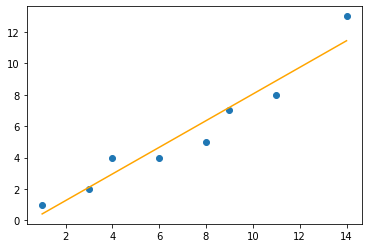

In [73]:
# Your code here.
model2 = linear_model.LinearRegression()

result = model2.fit(a,b)

regression_line = result.intercept_ + result.coef_*a
plt.scatter(a,b)
plt.plot(a , regression_line, c = "orange")
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
# Your response here. 

#It tells us that the higher the amount of people invited, the higher the amount of people who came to the party-

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [76]:
# Your response here. 

    #Went to see other peoples resolution because in my opinion I was thinking that there were no outlier points. 
    #Still, after check, it makes sense to understand if there is any point outside our Quantile interval, where the outliers points lies:
    
Q1 = parties_df.quantile(0.25)
Q3 = parties_df.quantile(0.75)
IQR = Q3 - Q1


print((parties_df < (Q1 - 1.5 * IQR)) |(parties_df > (Q3 + 1.5 * IQR)))

#The only point where the condition of the value in the dataframe is higher than the interval of Q3 + 1.5(Q3 -Q1) is the last point. so we can take it out.



       X      Y
0  False  False
1  False  False
2  False  False
3  False  False
4  False  False
5  False  False
6  False  False
7  False   True


0     1
1     3
2     4
3     6
4     8
5     9
6    11
Name: X, dtype: int64

In [84]:
c = parties_df["Y"][0:-1]
d = parties_df["X"][0:-1]

#just to check:
print(len(c))
print(len(d))

model3 = linear_model.LinearRegression()
result = model3.fit(c,d)

regression_line = result.intercept_ + result.coef_*c
plt.scatter(c,d)
plt.plot(c , regression_line, c = "orange")
plt.show()

7
7


ValueError: Expected 2D array, got 1D array instead:
array=[1 2 4 4 5 7 8].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
